In [5]:
%matplotlib inline

import numpy as np
import random
import matplotlib.pyplot as plt

from sklearn.datasets import make_gaussian_quantiles
from datetime import datetime
from scipy.sparse import csr_matrix
from sklearn import datasets, svm, metrics

In [7]:
n_events = 2
n_pmt = 60

gamma, ray_1 = make_gaussian_quantiles(mean = (4.5,4.5), cov = 1,
                                         n_samples = n_pmt, n_features = 2,
                                         n_classes = 1, random_state = 0) 

cosmic, ray_2 = make_gaussian_quantiles(mean = (10, 10), cov = 3,
                                         n_samples = n_pmt, n_features = 2,
                                         n_classes = 1, random_state = 0) 
    
# This is slightly confusing, make_gaussian_quantiles defines the variable x as an n x 2 matrix of x, y coordinates
# Now, I'm simply separating that matrix into two arrays: one array of x coordinates, one array of y coordinates

gammax_array = gamma[:, 0]
gammay_array = gamma[:, 1]

cosmicx_array = cosmic[:, 0]
cosmicy_array = cosmic[:, 1]

detection = np.arange(0, n_pmt, 1)

# At some point, ask Udara on what grid system HAWC is built.  Hopefully, the origin is not in the center. 
# I think I can define it myself... 

for j in range(n_pmt):
    detection[j] = 1
    gammax_array[j] = "{0:.1f}".format(gammax_array[j])
    gammay_array[j] = "{0:.1f}".format(gammay_array[j])
    cosmicx_array[j] = "{0:.1f}".format(cosmicx_array[j])
    cosmicy_array[j] = "{0:.1f}".format(cosmicy_array[j])

print(gammax_array)
print(cosmicx_array)

pixels = np.arange(0, 17, 0.1)
gammax_indeces = gammax_array*10
gammay_indeces = gammay_array*10
cosmicx_indeces = cosmicx_array*10
cosmicy_indeces = cosmicy_array*10

gammax_min, gammax_max = gammax_indeces.min() - 10, gammax_indeces.max() + 10
gammay_min, gammay_max = gammay_indeces.min() - 10, gammay_indeces.max() + 10
cosmicx_min, cosmicx_max = cosmicx_indeces.min() - 10, cosmicx_indeces.max() + 10
cosmicy_min, cosmicy_max = cosmicy_indeces.min() - 10, cosmicy_indeces.max() + 10

[ 4.   3.8  4.9  6.   4.4  3.2  3.3  5.3  6.8  6.4  4.2  4.9  3.6  3.7  6.3
  1.9  4.5  4.7  4.7  4.6  3.6  5.4  3.6  3.9  4.6  4.8  5.7  4.5  5.2  6.
  6.4  3.3  4.1  6.4  3.6  2.9  4.5  5.   4.1  2.9  3.4  4.2  5.7  5.5  5.5
  4.7  4.1  5.1  4.2  2.8  6.4  5.4  3.2  3.5  6.   4.9  3.6  5.6  4.   4.6]
[  9.1   8.8  10.7  12.6   9.8   7.8   8.   11.3  13.9  13.3   9.5  10.6
   8.5   8.6  13.1   5.6  10.1  10.3  10.3  10.2   8.4  11.6   8.5   8.9
  10.1  10.5  12.1  10.   11.3  12.7  13.3   8.    9.3  13.2   8.5   7.2
  10.   10.8   9.3   7.2   8.1   9.4  12.   11.7  11.6  10.4   9.3  11.1
   9.5   7.   13.2  11.5   7.8   8.2  12.6  10.8   8.4  12.    9.1  10.2]


In [8]:
# Come back to this, these arrays should probably be one and the same for the purpose of training the algorithm
gamma_image = csr_matrix((detection, (gammax_indeces, gammay_indeces)), shape = (len(pixels), len(pixels))).toarray() #These parentheses are important
cosmic_image = csr_matrix((detection, (cosmicx_indeces, cosmicy_indeces)), shape = (len(pixels), len(pixels))).toarray()

# Classification array for the images. 0 = gamma ray event, 1 = cosmic ray event.  This will have to be updated soon as well.
targets = np.arange(0, 2, 1)

print(gamma_image)
print(cosmic_image)



[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [9]:
images = np.concatenate((gamma_image, cosmic_image))

images_targets = list(zip(images, targets))

print(images_targets)

[(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0]), 0), (array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

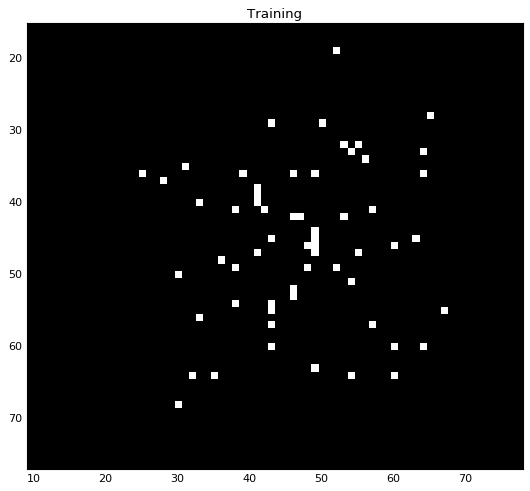

In [10]:
plt.figure(figsize = (8, 8))
plt.imshow(gamma_image, cmap = plt.cm.gray, interpolation = 'nearest')
plt.xlim(gammax_min, gammax_max)
plt.ylim(gammay_max, gammay_min)
plt.title('Training')
plt.show()

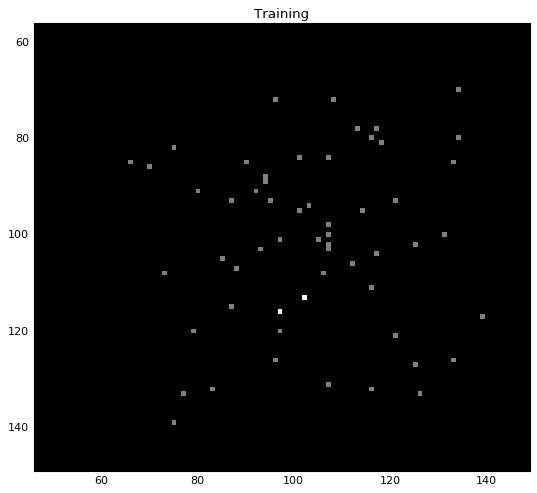

In [11]:
plt.figure(figsize = (8, 8))
plt.imshow(cosmic_image, cmap = plt.cm.gray, interpolation = 'nearest')
plt.xlim(cosmicx_min, cosmicx_max)
plt.ylim(cosmicy_max, cosmicy_min)
plt.title('Training')
plt.show()

In [12]:
# Reshape the image to go through classifier
data = images.reshape(n_events, -1)

print(data.shape)

# Classifier
clf = svm.SVC(gamma = 0.001)

# Train the algorithm
clf.fit(data, targets)

(2, 28900)
<type 'numpy.ndarray'>


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [53]:
expected = targets
predicted = clf.predict(data)

# expected = digits.target[n_samples // 2:]
# predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         1
          1       1.00      1.00      1.00         1

avg / total       1.00      1.00      1.00         2


Confusion matrix:
[[1 0]
 [0 1]]
